## Introduction

In this first lesson we cover topics that will be useful for the rest of the course. So today we will deal with various small arguments, rather than a big one.

### Why Python 
First of all few words on why we are concentrating on $\tt{python}$. 

In short, python is widely used even when it is somehow slower than other languages
because:
* is more productive; it is a very concise and expressive language and requires little time, effort, and lines of code to perform the same operations than with other languages;
* rich set of libraries and frameworks, maintained by a large community of users.

But unfortunately not all that glitters is gold !

Python is a so called interpreted language: it takes some code (a sequence of instructions), reads and executes it. 
This is different from other programming languages like C or C++ which compile code into a language that computers can understand directly (machine language). 

![](compiled_language.png)

As a result, python is essentially an interactive programming language, which means you can program and see the results almost at the same time. This is very nice for a faster development since "compilation" time can be quite long (just to give an idea the compilation of our C++ financial code takes more than one hour). 

However there are drawbacks in term of performance, the translation to machine language has to be done in real-time resulting in slower execution times.

![](machine_language.png)

The first few Chapters of the lecture notes cover the main features and characteristics of this programming language. 


As you probably know $\tt{python}$ is available in various versions (flavours), we are going to use the 3.X. It is not mandatory to use the exact same version,
most of those available in the 3 series should be OK.


## Data Analysis

The very first step of every analysis is data collection. There are many $\tt{python}$ modules to fetch financial data, here we will use $\tt{yfinance}$ which is based on the YahooFinance database. (More details on this module in the lecture notes).

In [5]:
import yfinance as yf
 
proxy = yf.Ticker('MSFT')
data = proxy.history(start="2020-01-01", end="2021-08-10") 

print (data.head())

                  Open        High         Low       Close    Volume  \
Date                                                                   
2019-12-31  154.118588  155.101675  153.803993  155.032852  18369400   
2020-01-02  156.094611  158.011628  155.652225  157.903488  22622100   
2020-01-03  155.642372  157.244794  155.386760  155.937286  21116200   
2020-01-06  154.423330  156.409171  153.862963  156.340347  20813700   
2020-01-07  156.625448  156.969520  154.659274  154.914871  21634100   

            Dividends  Stock Splits  
Date                                 
2019-12-31        0.0             0  
2020-01-02        0.0             0  
2020-01-03        0.0             0  
2020-01-06        0.0             0  
2020-01-07        0.0             0  


The $\tt{history}$ method returns a $\tt{pandas}$ dataframe which then can be easily manipulated.

In [49]:
proxy.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 181000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certifica

In [12]:
proxy.info['fullTimeEmployees']

181000

Another important aspect of an analysis is data representation. In order to plot data we are going to use the $\tt{matplotlib}$ module. Below a simple example although more details are available in the notes.

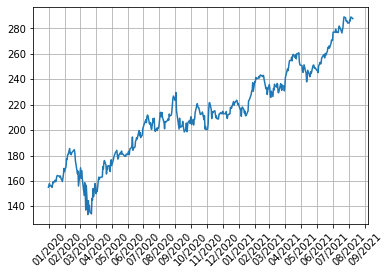

In [7]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

xd = data.index
yd = data['Close']
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y')) 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.plot(xd, yd)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

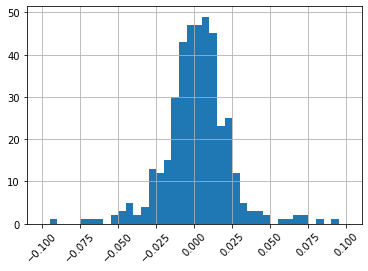

In [8]:
from scipy.stats import norm
import numpy

returns = data['Close'].pct_change()

plt.hist(returns, bins=40, range=(-0.10, 0.10))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [11]:
print (returns.mean())

0.001803585275647851


A stock price is a nice example of random variable...

## Random Variable

In probability and statistics a random variable is described as a variable whose values depend on outcomes of a random phenomenon. 

For example, in the event of a coin toss, only two outcomes are possible: heads or tails. If instead the random variable is designated to represent the sum of the resulting numbers after three dice are rolled, it could be 3 (1+1+1), 18 (6+6+6), or somewhere between 3 and 18.

A random variable is required to be measurable, which allows for probabilities to be assigned to sets of its potential values.

A random variable is different from an algebraic variable. The variable in an algebraic equation is an unknown value that can be calculated. The equation $10 + x = 13$ shows that we can calculate the specific value for $x$ which is 3. On the other hand, a random variable has a set of values, and any of those values could be the resulting outcome each of them with a certain probability.

![pippo](random_process.png)

In the corporate world, random variables can be assigned to properties such as the average price of an asset over a given time period, the return on investment after a specified number of years, the estimated turnover rate at a company within the following six months, etc. Risk analysts assign random variables to risk models when they want to estimate the probability of an adverse event occurring.

When the range of possible values for $X$ is un-countably infinite then it is called a continuous random variable and its distribution can be described by a probability density function (PDF). Contrary if the range is countable, the random variable is called a discrete random variable and its distribution can be interpreted as a discrete probability distribution.

![pippo](pdf_pmf.png)

In [2]:
from scipy.stats import norm

print (norm.pdf(0))

0.3989422804014327


The probability density function is non-negative everywhere, and its integral over the entire space is equal to 1. 

## CDF and Quantiles

The cumulative distribution function (CDF) $F$ of a random variable $X$, evaluated at $x$, is the probability that $X$ will take a value less than or equal to $x$

$$F_X(x) = Pr(X\leq x) = \int_{-\infty}^{x} f(x)dx$$

$$Pr(a \leq X\leq b) = \int_{a}^{b} f(x)dx$$

The quantile function $Q$, associated with a probability distribution of a random variable, specifies the value $x$ of the random variable such that the probability $p$ of the variable being less than or equal to that value equals the given probability. It is also called the percent-point function (PPF) or inverse cumulative distribution.

In terms of the cumulative distribution function $F$, the quantile function $Q$ returns the value $x_p$ such that

$$F_X(x_p) = P(X \leq x_p) = p$$

So the quantile function does the "inverse" of the cumulative distribution function: given a
probability $p$ (or a value of the CDF) it returns the $x$ at which the CDF reaches this probability.

![pippo](percentile.png)

In [5]:
quantile = norm.ppf(0.3)
cdf = norm.cdf(quantile)
print ("30%−quantile of standard normal is {:.4f}".format(quantile)) 
print ("CDF value at {:.4f}: {:.4f}".format(quantile, cdf))

30%−quantile of standard normal is -0.5244
CDF value at -0.5244: 0.3000


If instead of a distribution you have a dataset the quantile can be determined using the
function $\tt{numpy.percentile}$ (this will be useful when estimating VaR). Notice that in this case
we are talking about percentile which is the quantile times 100 (e.g. 50-percentile is equivalent to the 0.5-quantile)

In [6]:
import numpy
dist = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# first argument the data−set
# second argument a list of percentiles 
perc = numpy.percentile(dist, [1, 50]) 
print (perc)

[1.08 5.  ]


### Expected Value

The outcomes of a random variable $X$ are connected to probabilities, hence in order to evaluate $X$ all the possibilities need to be taken into account. This is done with the \emph{expected value} which is a generalization of the weighted average, and is intuitively the arithmetic mean of a large number of independent realizations of $X$.

#### Discrete Case
Let $X$ be a random variable with a finite number of finite outcomes ($x_1, x_2, \ldots , x_k$) occurring with probabilities ($p_1, p_2, \ldots , p_k$) respectively. The expectation of $X$ is then defined as

$$\mathbb{E}[X] = \sum_{i=1}^{k} x_i p_i = x_1 p_1 + x_2 p_2 +\ldots+x_kp_k$$

As an example let $X$ represents the outcome of a roll of a fair six-sided die. The possible values for $X$ are 1, 2, 3, 4, 5, and 6, all of which are equally likely with probability 1/6.
The expectation of $X$ is then

$$\mathbb{E}[X]= 1\cdot 1/6 +2\cdot 1/6+3\cdot 1/6+4\cdot 1/6+5\cdot 1/6+6\cdot 1/6$$

In [7]:
prob = 1/6
expectation = 0
for i in range(1, 7):
    expectation += i*prob
    
print (expectation)

3.5


### Continuous Case

If $X$ is a random variable with a probability density function of $f (x)$, then the expected value is defined as

$$\mathbb{E}[X] = \int_{\Omega} x\cdot f(x) dx$$

$\Omega$ represents the space of all the possible values taken by $x$.

## Time Value of Money and Discounting
A bank offers a guaranteed return of 10% on whichever amount of money I put in my account as long as that amount stays in the account for one full year. I know that I would need 11000 dollars at the end of one year to buy something. 
What do I need to put in today, so that the $X$ amount (principal) @ 10% a year will grow up to 11000 at the end of year one?

We know that at 10%, a dollar today grows to

\begin{equation*}
1 \cdot (1 + 10\%) = 1.1
\end{equation*}

If we invert this equation the needed investment $X$ can be found:

\begin{equation*}
X \cdot (1 + 10\%) = 11000\\
X = 11000 / (1 + 10\%)
\end{equation*}

In [1]:
11000/(1+0.1)

10000.0

What this says is that to have 11000 dollars one year from now, we need 10000 dollars at an interest rate of 10% today.
What about 11000 dollars two years from now ? Taking the approach used above

\begin{equation*}
X = 11000 / \left((1 + 10\%) \cdot (1 + 10\%)\right) =  11000/(1+10\%)^ 2
\end{equation*}

In [2]:
11000/(1+0.1)**2

9090.90909090909

Which means the 11000 dollars we need two years from now are valued about 9090 dollars today.

What we have just done above is called *discounting*. We are adjusting (i.e. discounting) the value of a payment that will be received at a point in future. Therefore, we are discounting back a future value to bring it to its present value. The rate used to adjust the future payment is called the *discount rate*.

The idea behind discounting is also known as time value of money. Since a dollar at a fixed interest rate will grow in any bank account at that certain rate, if it is invested in an alternate opportunity, it should at least earn that rate from the other alternative to even consider the alternative worth thinking about. Discounting adjusts future payments, investment returns and even return of principal on this basis. The bottom line is that if you fail to earn the discount rate, you have actually lost money, since any bank, would at least have given you the discount rate as return for depositing your money with them. Anything less than that would mean that you have not put your money to its best use.

When we calculate the value of future payments today, we are doing a *present value* (NPV or PV) calculation. When we calculate the value of anything in the future we do a *future value* calculation.

A positive NPV denotes that at a certain cost of capital the returns or inflows from an investment opportunity outweigh the outflows or costs of investment, and vice versa. Obviously, when comparing various alternatives available for investment, the option with the most positive NPV or least negative NPV will be favoured or chosen. 

As an example imagine that you have the chance to invest in a project, Ventures, Inc. that will pay 100 dollars in year 1, and 200 dollars in year 2. How much are you willing to pay for this opportunity ? (assume an annual discount rate of 10\%).

The answer to the question is that you will be willing to pay at most an amount that is equal to the present value of this stream of payments. To calculate the present value, you need to divide the payment by its respective discount factors ($D_n$ discount factor for year $n$).

\begin{equation}
D_n = \cfrac{1}{(1 + r)^n}
\end{equation}

In [13]:
d1 = 1/(1 + 0.1)**1
d2 = 1/(1 + 0.1)**2

print ("discount factor for year 1: {:.2f}".format(d1))
print ("discount factor for year 2: {:.2f}".format(d2))

discount factor for year 1: 0.91
discount factor for year 2: 0.83


In [14]:
pv = 100*d1 + 200*d2

print ("Total PV: {:.2f}$".format(pv))

Total PV: 256.20$


Hence, you would be willing to pay 256.2 dollars for this opportunity.

If there are $Y$ payments each year the discount factor formula becomes

\begin{equation}
D_n = \left(1+\cfrac{r}{Y}\right)^{-n}
\end{equation}

When the continuously-compounded hypothesis is used the discount factor becomes

\begin{equation}
D_n = e^{-rn}
\end{equation}

## Payment Dates Generator

Before going on with the lesson let's develop a $\tt{python}$ utility. Since from now on we need to create many lists of dates (e.g. payment dates for our contracts) we will write a function that does that for us. 

The function will take as input a starting date (the first date of the list), and a maturity (in months) which represents the length of the list. The tenor for the moment will be 12 months by default, when needed we will modify it.

Notice that if the maturity is not a multiple of 12 months the last period will be truncated to the last computed date.

In [2]:
from datetime import date
from dateutil.relativedelta import relativedelta

def generate_dates(start_date, n_months):
    dates = []
    for i in range(0, n_months, 12):
        dates.append(start_date + relativedelta(months=i))
    dates.append(start_date + relativedelta(months=n_months))
    return dates

In [3]:
# test the function
print (generate_dates(date.today(), 15))

[datetime.date(2021, 9, 14), datetime.date(2022, 9, 14), datetime.date(2022, 12, 14)]


**Create skeleton of finmarkets library and add $\tt{generate\_dates}$.**

## Bond

A bond is an instrument that represents a loan made by an investor to a borrower (typically corporate or governmental). Bonds are used by companies, municipalities, states, and sovereign governments to finance projects and operations.

Owners of bonds are *debt-holders*, or creditors, of the *issuer*. Bond details include the end date (when the principal of the loan is due to be paid to the bond owner) and usually includes the terms for variable or fixed interest payments made by the borrower.
The *coupon* is the interest rate that the issuer pays to the holder. This rate can be fixed throughout the life of the bond but it can also vary with a money market index, such as LIBOR, or it can be even more exotic.

**The value of a bond can be computed as the present discounted value of future cash flows generated by the bond itself.**

For example consider a 3-years bond with a face value of 100 EUR providing coupons at a 6% rate annually. Assume also that the spot rates are 5.0% 5.8% and 6.4% for 1, 2, 3 year maturities. To compute the present value of the first coupon we need to discount it at 5.0% for 1 year, for the second the discount has to be at 5.8% and so on. 

In [78]:
from math import exp

rates = [0.05, 0.058, 0.064] 
N = 100
maturity = 3
fixed_coupon = 0.06

price = 0
for tau in range(maturity):
    price += N * fixed_coupon * exp(-rates[tau] * (tau+1))
price += N * exp(-rates[tau] * (tau+1)) 

print ("{:.2f} EUR".format(price))

98.53 EUR


### Yield to Maturity

The *yield to maturity* is the interest rate that makes the present value of the future coupon payments equal to the current bond price, that is, for a known price $P_0$, the yield is the solution $y$ to the equation

\begin{equation}
	P_0 = \sum_{t=1}^T e^{-yt}C + e^{-yT}F 
\end{equation}
where $C$ is the coupon end $F$ the nominal.

Finding the yield to maturity is equivalent to find the zeros of the previous function. To find the zeros of a function $f(x)$ means to find the values of $\hat{x}$ for which $f(\hat{x})=0$. There are various methods to solve this problem (which is also called root-finding), the simplest being the *bisection method*.

![](bisection_method.png)

In $\tt{python}$ this algorithm is implemented in $\tt{scipy.optimize.bisect}$.

In [5]:
from scipy.optimize import bisect
from datetime import date
from finmarkets import generate_dates

def ytom(y, N, C, P0, start_date=date.today(), maturity_years=4, tenor=0.5):
    price = 0
    payment_dates = generate_dates(start_date, maturity_years*12, tenor*12)

    for p in payment_dates[1:]:
        dt = (p - start_date).days/365
        price += C*tenor*N/(1+y)**dt 
    price += N/(1+y)**dt - P0
    return price

bis = (bisect(ytom, -0.99, 1, args=(100, 0.1, 92)))
print (bis)

0.12998780026036003


An interesting alternative is the $\tt{Brent}$ method available in $\tt{scipy.optimize.brentq}$.

In [6]:
from scipy.optimize import brentq

bis = (brentq(ytom, -0.99, 1, args=(100, 0.1, 92)))
print (bis)

0.12998780025953005
